In [28]:
import os
import glob
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow import keras
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [29]:
train_csv=pd.read_csv("/Users/joshna/Desktop/Training_set.csv")
test_csv=pd.read_csv("/Users/joshna/Desktop/Testing_set.csv")

In [30]:
train_fo1=glob.glob(r"/Users/joshna/Desktop/Training_set.csv")
test_fo1=glob.glob("/Users/joshna/Desktop/Testing_set.csv")

In [31]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [32]:
train_csv.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [33]:
l=train_csv.label.value_counts()
fig=px.pie(train_csv,values=l.values,names=l.index,title='Human Activity Distribution')
fig.show()

In [34]:
X_train=train_csv['filename']
y_train=train_csv['label']

In [35]:
img_data=[]
img_label=[]
length=len(train_fo1)
for i in (range(len(train_fo1)-1)):
    t='..//Users/joshna/Desktop/train/'+X_train[i]
    temp_img=Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(y_train[i])

In [36]:
inp_shape=(160,160,3)

In [37]:
iii=img_data
iii=np.asarray(iii)
type(iii)

numpy.ndarray

In [38]:
Y_train=to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

sitting


In [40]:
vgg_model=Sequential()
pretrained_model=tf.keras.applications.VGG16(include_top=False,
                 input_shape=(160,160,3),pooling='avg',classes=15,weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(15,activation='softmax'))

In [41]:
vgg_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

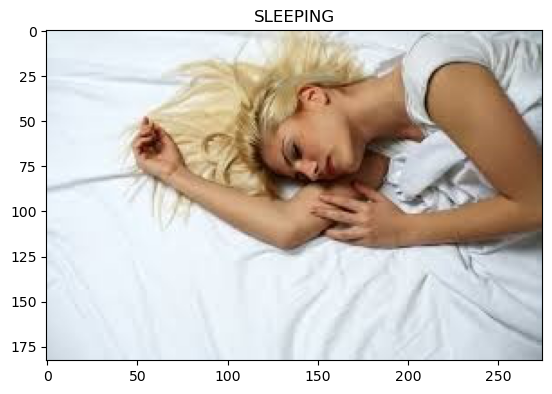

In [50]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
plt.title("SLEEPING")
image=mpimg.imread(r"/Users/joshna/Desktop/test/Image_188.jpg")
plt.imshow(image)
plt.show()